In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt # for data visualization
from matplotlib import pyplot as plt
import seaborn as sns # for statistical data visualization
%matplotlib inline



In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("Travel_scrape.csv")
df.head()
df = df.astype(str)

In [5]:
df.isnull().sum()

Hotel            0
Room Type        0
Rate             0
Check-in Date    0
Search Date      0
Search Time      0
Unnamed: 6       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8051 entries, 0 to 8050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hotel          8051 non-null   object
 1   Room Type      8051 non-null   object
 2   Rate           8051 non-null   object
 3   Check-in Date  8051 non-null   object
 4   Search Date    8051 non-null   object
 5   Search Time    8051 non-null   object
 6   Unnamed: 6     8051 non-null   object
dtypes: object(7)
memory usage: 440.4+ KB


In [7]:
df.drop('Unnamed: 6', axis='columns', inplace=True)
df = df.astype(str)
df['Rate'] = df['Rate'].apply(lambda x: x[3:])
df.head()

,Hotel,Room Type,Rate,Check-in Date,Search Date,Search Time
0,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,2022-08-03,2022-08-03,0:00:00
1,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,2022-08-03,2022-08-03,1:00:00
2,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,2022-08-03,2022-08-03,2:00:00
3,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,2022-08-03,2022-08-03,3:00:00
4,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,2022-08-03,2022-08-03,4:00:00


In [8]:
# df['Check-in Date'] = pd.to_datetime(df['Check-in Date'])
# df['Search Date'] = pd.to_datetime(df['Search Date'])

In [9]:
# df['Date_gap'] = df['Check-in Date'] - df['Search Date']
# df["Date_gap"]= df["Date_gap"].replace( r"days","", regex=True)
# df["Date_gap"]= df["Date_gap"].replace( r"days","", regex=True)

In [10]:
#df["Date_gap"]=df["Date_gap"].apply(str)
#df["Date_gap"]= df["Date_gap"].replace( r"days","", regex=True)

In [11]:
#df['Date_gap'] = df['Date_gap'].apply(lambda x: x[:4])

In [12]:
df.tail()

,Hotel,Room Type,Rate,Check-in Date,Search Date,Search Time
8046,Tuscany Suites & Casino,Executive Suite,121,2022-08-20,2022-08-07,21:00:00
8047,Tuscany Suites & Casino,Executive Suite,139,2022-08-20,2022-08-07,22:00:00
8048,Tuscany Suites & Casino,Deluxe Executive King Non-Smoking Suite,168,2022-08-20,2022-08-07,23:00:00
8049,Tuscany Suites & Casino,Executive Suite,143,2022-08-20,2022-08-08,0:00:00
8050,Tuscany Suites & Casino,Executive Double Room,147,2022-08-20,2022-08-08,0:00:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8051 entries, 0 to 8050
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hotel          8051 non-null   object
 1   Room Type      8051 non-null   object
 2   Rate           8051 non-null   object
 3   Check-in Date  8051 non-null   object
 4   Search Date    8051 non-null   object
 5   Search Time    8051 non-null   object
dtypes: object(6)
memory usage: 377.5+ KB


In [14]:
# Check missing values
df.isnull().sum()

Hotel            0
Room Type        0
Rate             0
Check-in Date    0
Search Date      0
Search Time      0
dtype: int64

In [15]:
len(df['Hotel'].unique())

7

In [16]:
len(df['Room Type'].unique())

33

In [17]:
X = df
y = df['Room Type']
# Convert Categorical values to Numericals

df.drop(['Check-in Date', 'Search Date'], axis=1, inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Hotel'] = le.fit_transform(X['Hotel'])
X['Room Type'] = le.fit_transform(X['Room Type'])
X['Search Time'] = le.fit_transform(X['Search Time'])

In [19]:
X.tail()

,Hotel,Room Type,Rate,Search Time
8046,6,19,121,13
8047,6,19,139,14
8048,6,8,168,15
8049,6,19,143,0
8050,6,14,147,0


###  Feature Scaling

In [20]:
cols = X.columns

In [21]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X = ms.fit_transform(X)

In [22]:
X = pd.DataFrame(X, columns=[cols])

In [23]:
X.head()

,Hotel,Room Type,Rate,Search Time
0,0.0,0.75,0.30148,0.000000
1,0.0,0.75,0.30148,0.478261
2,0.0,0.75,0.30148,0.695652
3,0.0,0.75,0.30148,0.739130
4,0.0,0.75,0.30148,0.782609


## K-Means model with N clusters

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

## K-Means model parameters study

In [25]:
kmeans.cluster_centers_

array([[0.12278296, 0.84954402, 0.27057436, 0.48584512],
       [0.6579194 , 0.41003788, 0.15695423, 0.22956141],
       [0.65824248, 0.40421622, 0.15590862, 0.7615231 ]])

In [26]:
kmeans.inertia_

1281.211266274921

In [27]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 0 out of 8051 samples were correctly labeled.


In [28]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.00


In [29]:
# Elbow Plot

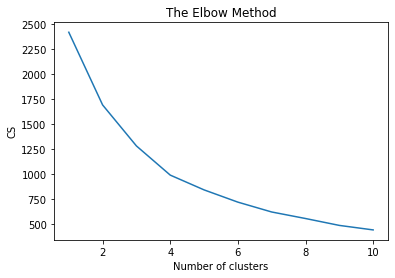

In [36]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()